In [ ]:
# Execute this code block to install dependencies when running on colab
try:
    import torch
except:
    from os.path import exists
    from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
    platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
    cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
    accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

    !pip install -q http://download.pytorch.org/whl/{accelerator}/torch-1.0.0-{platform}-linux_x86_64.whl torchvision

try: 
    import torchbearer
except:
    !pip install torchbearer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 138 kB 4.9 MB/s 


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!ls ./gdrive/MyDrive/Caltech-101/caltech-101/

accordion	   cougar_body	    garfield	  menorah     snoopy
airplanes	   cougar_face	    gerenuk	  metronome   soccer_ball
anchor		   crab		    gramophone	  minaret     stapler
ant		   crayfish	    grand_piano   Motorbikes  starfish
BACKGROUND_Google  crocodile	    hawksbill	  nautilus    stegosaurus
barrel		   crocodile_head   headphone	  octopus     stop_sign
bass		   cup		    hedgehog	  okapi       strawberry
beaver		   dalmatian	    helicopter	  pagoda      sunflower
binocular	   dollar_bill	    ibis	  panda       tick
bonsai		   dolphin	    inline_skate  pigeon      trilobite
brain		   dragonfly	    joshua_tree   pizza       umbrella
brontosaurus	   electric_guitar  kangaroo	  platypus    watch
buddha		   elephant	    ketch	  pyramid     water_lilly
butterfly	   emu		    lamp	  revolver    wheelchair
camera		   euphonium	    laptop	  rhino       wild_cat
cannon		   ewer		    Leopards	  rooster     windsor_chair
car_side	   Faces	    llama	  saxophone   wrench
ceiling_fan	   Faces_e

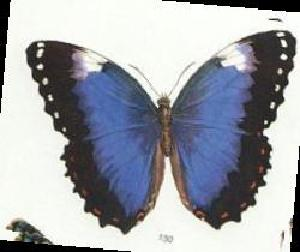

In [ ]:
from IPython.display import Image
Image("./gdrive/MyDrive/Caltech-101/caltech-101/butterfly/image_0008.jpg")

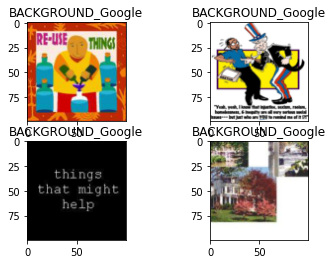

In [ ]:
from torchvision import transforms 
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

batch_size=128
image_size=(300, 200)

transform = transforms.Compose([
    transforms.Resize((100, 100)),
    transforms.ToTensor()  # convert to tensor
])

train_dataset = ImageFolder("./gdrive/MyDrive/Caltech-101/caltech-101/", transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

# generate the first batch
(batch_images, batch_labels) = train_loader.__iter__().__next__()

# plot 4 images
plt.subplot(221).set_title(train_dataset.classes[batch_labels[0]])
plt.imshow(batch_images[0].permute(1, 2, 0), aspect='equal')
plt.subplot(222).set_title(train_dataset.classes[batch_labels[1]])
plt.imshow(batch_images[1].permute(1, 2, 0), aspect='equal')
plt.subplot(223).set_title(train_dataset.classes[batch_labels[2]])
plt.imshow(batch_images[2].permute(1, 2, 0), aspect='equal')
plt.subplot(224).set_title(train_dataset.classes[batch_labels[3]])
plt.imshow(batch_images[3].permute(1, 2, 0), aspect='equal')

# show the plot
plt.show()

In [ ]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import transforms 
import matplotlib
import matplotlib.pyplot as plt
import numpy
# the number of images that will be processed in a single step
batch_size=128
# the size of the images that we'll learn on - we'll shrink them from the original size for speed
image_size=(100, 100)

transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor()  # convert to tensor
])

train_dataset = ImageFolder("./gdrive/MyDrive/Caltech-101/caltech-101/", transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = ImageFolder("./gdrive/MyDrive/Caltech-101/caltech-101/", transform)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

test_dataset = ImageFolder("./gdrive/MyDrive/Caltech-101/caltech-101/", transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
import torchbearer
from torchbearer import Trial
from torch import optim
from torch import nn

model = torch.hub.load('facebookresearch/barlowtwins:main', 'resnet50')

# define the loss function and the optimiser
loss_function = nn.CrossEntropyLoss()
optimiser = optim.Adam(model.parameters())

device = "cuda:0" if torch.cuda.is_available() else "cpu"
trial = Trial(model, optimiser, loss_function, metrics=['loss', 'accuracy']).to(device)
trial.with_generators(train_loader, val_generator=val_loader, test_generator=test_loader)
trial.run(epochs=10)
results = trial.evaluate(data_key=torchbearer.VALIDATION_DATA)
print()
print(results)

Downloading: "https://github.com/facebookresearch/barlowtwins/zipball/main" to /root/.cache/torch/hub/main.zip
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Downloading: "https://dl.fbaipublicfiles.com/barlowtwins/ep1000_bs2048_lrw0.2_lrb0.0048_lambd0.0051/resnet50.pth" to /root/.cache/torch/hub/checkpoints/resnet50.pth


  0%|          | 0.00/90.0M [00:00<?, ?B/s]

0/10(t):   0%|          | 0/72 [00:00<?, ?it/s]

0/10(v):   0%|          | 0/72 [00:00<?, ?it/s]

1/10(t):   0%|          | 0/72 [00:00<?, ?it/s]

1/10(v):   0%|          | 0/72 [00:00<?, ?it/s]

2/10(t):   0%|          | 0/72 [00:00<?, ?it/s]

2/10(v):   0%|          | 0/72 [00:00<?, ?it/s]

3/10(t):   0%|          | 0/72 [00:00<?, ?it/s]

3/10(v):   0%|          | 0/72 [00:00<?, ?it/s]

4/10(t):   0%|          | 0/72 [00:00<?, ?it/s]

4/10(v):   0%|          | 0/72 [00:00<?, ?it/s]

5/10(t):   0%|          | 0/72 [00:00<?, ?it/s]

5/10(v):   0%|          | 0/72 [00:00<?, ?it/s]

6/10(t):   0%|          | 0/72 [00:00<?, ?it/s]

6/10(v):   0%|          | 0/72 [00:00<?, ?it/s]

7/10(t):   0%|          | 0/72 [00:00<?, ?it/s]

7/10(v):   0%|          | 0/72 [00:00<?, ?it/s]

8/10(t):   0%|          | 0/72 [00:00<?, ?it/s]

8/10(v):   0%|          | 0/72 [00:00<?, ?it/s]

9/10(t):   0%|          | 0/72 [00:00<?, ?it/s]

9/10(v):   0%|          | 0/72 [00:00<?, ?it/s]

0/1(e):   0%|          | 0/72 [00:00<?, ?it/s]


{'val_loss': 0.0010141178499907255, 'val_acc': 0.9995630383491516}


In [ ]:
predictions = trial.predict()
predicted_classes = predictions.argmax(1).cpu()
true_classes = list(x for (_,x) in test_dataset.samples)

from sklearn import metrics
print(metrics.classification_report(true_classes, predicted_classes, target_names=train_dataset.classes))

0/1(p):   0%|          | 0/72 [00:00<?, ?it/s]

                   precision    recall  f1-score   support

BACKGROUND_Google       1.00      1.00      1.00       467
            Faces       1.00      0.99      1.00       435
       Faces_easy       0.99      1.00      1.00       435
         Leopards       1.00      1.00      1.00       200
       Motorbikes       1.00      1.00      1.00       808
        accordion       1.00      1.00      1.00        55
        airplanes       1.00      1.00      1.00       800
           anchor       1.00      1.00      1.00        42
              ant       1.00      1.00      1.00        42
           barrel       1.00      1.00      1.00        47
             bass       1.00      1.00      1.00        54
           beaver       1.00      1.00      1.00        46
        binocular       1.00      1.00      1.00        33
           bonsai       1.00      1.00      1.00       128
            brain       1.00      1.00      1.00        98
     brontosaurus       1.00      1.00      1.00       